Importing Libraries

In [242]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import warnings

In [243]:
df = pd.read_csv("uber.csv")

In [244]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


Knowing the data


In [245]:
df.describe()


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


Removing Null values as there is only one null value present

In [247]:
df[df.isnull().any(axis=1)]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
87946,32736015,2013-07-02 03:51:57.0000001,24.1,2013-07-02 03:51:57 UTC,-73.950581,40.779692,NaN,NaN,0


In [248]:
df2 = df.dropna(inplace = True)

In [249]:
df.duplicated().sum()

np.int64(0)

Removing unnecessary columns

In [250]:

df.drop(columns=['Unnamed: 0','key'],inplace=True)

In [251]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


Converting lat long into distances

In [252]:
from geopy.distance import great_circle
lat1,lat2,lon1,lon2 = 40.5, 41.5,-74.5, -72.5
def haversine_distance(lat1, lon1, lat2, lon2):
    return great_circle((lat1, lon1), (lat2, lon2)).km

In [253]:
df[(df['dropoff_latitude']==df['pickup_latitude']) & (
    df['dropoff_longitude']==df['pickup_longitude'])]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
7,2.5,2012-12-11 13:52:00 UTC,0.000000,0.000000,0.000000,0.000000,1
11,8.5,2011-05-23 22:15:00 UTC,0.000000,0.000000,0.000000,0.000000,1
48,56.8,2013-01-03 22:24:41 UTC,-73.993498,40.764686,-73.993498,40.764686,1
65,6.0,2014-05-05 19:27:00 UTC,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...
199880,6.5,2014-02-22 06:45:46 UTC,0.000000,0.000000,0.000000,0.000000,1
199883,12.5,2012-09-10 17:39:00 UTC,0.000000,0.000000,0.000000,0.000000,2
199917,4.5,2013-06-24 22:17:43 UTC,-73.793768,40.656939,-73.793768,40.656939,1
199932,24.9,2011-03-22 13:59:00 UTC,-73.974618,40.756295,-73.974618,40.756295,5


In [254]:
valid_df = df[(df['pickup_latitude'].between(-90, 90)) & 
              (df['dropoff_latitude'].between(-90, 90))]

In [255]:
df[(df['dropoff_latitude']==df['pickup_latitude']) & (
    df['dropoff_longitude']==df['pickup_longitude'])].describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5632.000000,5632.000000,5632.000000,5632.000000,5632.000000,5632.000000
mean,11.585318,-26.781973,14.759799,-26.781973,14.759799,1.672763
std,14.096550,35.563548,19.668874,35.563548,19.668874,1.300240
min,0.000000,-74.689831,-73.991255,-74.689831,-73.991255,0.000000
25%,5.300000,-73.955488,0.000000,-73.955488,0.000000,1.000000
50%,7.700000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,12.000000,0.000000,40.739040,0.000000,40.739040,2.000000
max,350.000000,40.772062,42.402087,40.772062,42.402087,6.000000


In [256]:
df["distance_km"] = valid_df.apply(lambda row: haversine_distance(
    row["pickup_latitude"], row["pickup_longitude"], row["dropoff_latitude"], row["dropoff_longitude"]), axis=1)
df = df[df["distance_km"] > 0]

In [257]:
df[(df['fare_amount']<0)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
63395,-5.00,2015-03-03 23:07:41 UTC,-73.992249,40.748936,-73.988518,40.748180,1,0.325307
71246,-3.30,2010-02-11 21:47:10 UTC,-73.952725,40.768235,-73.949928,40.772208,2,0.500647
79903,-3.50,2015-05-01 14:43:02 UTC,-73.982430,40.775024,-73.981750,40.778439,1,0.383918
89322,-49.57,2010-03-09 08:26:10 UTC,-73.972772,40.785657,-73.972867,40.785500,5,0.019203
92063,-23.70,2010-03-12 08:49:10 UTC,-73.952740,40.768233,-74.007028,40.707338,3,8.171308
98875,-52.00,2015-03-20 21:31:14 UTC,-74.000359,40.728729,-74.005699,40.728680,5,0.450055
104080,-7.30,2010-03-09 20:25:10 UTC,-73.952623,40.766942,-73.953787,40.784882,1,1.997246
111589,-52.00,2015-02-23 19:26:44 UTC,-73.984665,40.759026,0.000000,0.000000,5,8666.259181
139272,-6.90,2010-02-23 18:52:10 UTC,-73.988727,40.736445,-73.977622,40.750487,1,1.820227
148803,-5.70,2010-02-12 10:50:10 UTC,-73.977300,40.742783,-73.988837,40.747465,3,1.102573


In [258]:
df[(df['fare_amount']<0)].describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,-16.992353,-73.968114,40.746327,-69.631788,38.353826,2.176471,512.139491
std,20.064948,0.049814,0.032088,17.943708,9.883584,1.550617,2101.274622
min,-52.000000,-74.004646,40.648677,-74.007028,0.000000,1.000000,0.019203
25%,-23.700000,-73.988727,40.736445,-73.988837,40.728680,1.000000,0.383918
50%,-5.700000,-73.983727,40.759026,-73.985924,40.750487,1.000000,0.538322
75%,-3.500000,-73.964257,40.766942,-73.976975,40.763522,3.000000,1.997246
max,-3.000000,-73.784868,40.785657,0.000000,40.785500,5.000000,8666.259181


In [259]:
df[df['distance_km']>100]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
346,15.5,2015-03-05 19:15:07 UTC,0.000000,0.000000,-73.979805,40.786030,1,8666.410254
1067,52.0,2014-02-02 22:27:00 UTC,-73.781095,40.645015,0.000000,0.000000,1,8647.047814
1526,2.5,2014-05-12 12:00:15 UTC,-74.001849,40.715156,0.000000,0.000000,3,8666.784652
1945,7.0,2013-02-10 16:18:00 UTC,-0.131667,40.757063,-73.991593,40.749953,1,6021.122795
2167,5.7,2012-07-21 12:16:00 UTC,-1.216667,40.748597,-74.004822,40.734670,1,5941.068194
...,...,...,...,...,...,...,...,...
198567,23.5,2013-10-21 01:28:00 UTC,-73.968115,40.801455,0.000000,0.000000,2,8665.759409
198665,20.1,2012-06-26 21:29:00 UTC,-0.116667,40.729775,0.000000,0.000000,5,4528.966080
199403,7.0,2013-01-20 17:58:29 UTC,-67.370360,39.999790,-73.971058,40.753000,1,565.235381
199641,8.1,2012-06-22 12:36:00 UTC,-74.000143,40.742877,-7.995197,40.759382,5,5419.541409


In [260]:
df.drop(df[df['distance_km'] > 100].index, inplace=True)

/var/folders/pv/4dhzv95x4_x0ws5wq242c90r0000gn/T/ipykernel_6575/4245381347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['distance_km'] > 100].index, inplace=True)


Handling duplicate values

In [261]:
df.drop_duplicates(subset = [col for col in df.columns if col!='pickup_datetime'])

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683325
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457593
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036384
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661686
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475456
...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.112210
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.875053
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,12.850337
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.539720


In [262]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193895 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        193895 non-null  float64            
 1   pickup_datetime    193895 non-null  datetime64[ns, UTC]
 2   pickup_longitude   193895 non-null  float64            
 3   pickup_latitude    193895 non-null  float64            
 4   dropoff_longitude  193895 non-null  float64            
 5   dropoff_latitude   193895 non-null  float64            
 6   passenger_count    193895 non-null  int64              
 7   distance_km        193895 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 13.3 MB


/var/folders/pv/4dhzv95x4_x0ws5wq242c90r0000gn/T/ipykernel_6575/1718852004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193895 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        193895 non-null  float64            
 1   pickup_datetime    193895 non-null  datetime64[ns, UTC]
 2   pickup_longitude   193895 non-null  float64            
 3   pickup_latitude    193895 non-null  float64            
 4   dropoff_longitude  193895 non-null  float64            
 5   dropoff_latitude   193895 non-null  float64            
 6   passenger_count    193895 non-null  int64              
 7   distance_km        193895 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 13.3 MB


In [264]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
count,193895.000000,193895.000000,193895.000000,193895.000000,193895.000000,193895.000000,193895.000000
mean,11.345016,-73.910608,40.688539,-73.909639,40.688848,1.684984,3.361438
std,9.735388,2.684919,2.629207,2.685007,2.629533,1.388549,3.728253
min,-52.000000,-75.387785,-74.015515,-75.417737,-74.015750,0.000000,0.000084
25%,6.000000,-73.992279,40.736443,-73.991600,40.735312,1.000000,1.279832
50%,8.500000,-73.982130,40.753292,-73.980567,40.753737,1.000000,2.179478
75%,12.500000,-73.968456,40.767531,-73.965514,40.768327,2.000000,3.937338
max,499.000000,40.808425,45.031653,40.831932,45.031598,208.000000,99.162650


/var/folders/pv/4dhzv95x4_x0ws5wq242c90r0000gn/T/ipykernel_6575/3561895848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['pickup_datetime'].dt.day_name()


<Axes: xlabel='day_of_week', ylabel='count'>

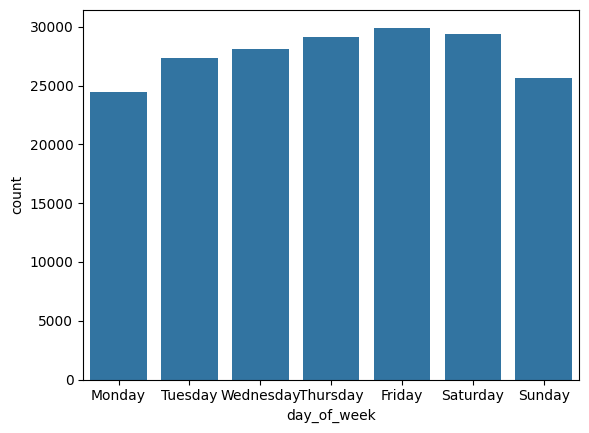

In [265]:
df['day_of_week'] = df['pickup_datetime'].dt.day_name()
sns.countplot(x='day_of_week', data=df, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

In [266]:
df['hour'] = df['pickup_datetime'].dt.hour
df

/var/folders/pv/4dhzv95x4_x0ws5wq242c90r0000gn/T/ipykernel_6575/2775549525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['pickup_datetime'].dt.hour


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,day_of_week,hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683325,Thursday,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457593,Friday,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036384,Monday,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661686,Friday,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475456,Thursday,17
...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.112210,Sunday,10
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1.875053,Friday,1
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,12.850337,Monday,0
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,3.539720,Wednesday,14


In [267]:
# from ydata_profiling import ProfileReport
# report = ProfileReport(df)
# report.to_file(output_file='output.html')

there is a outlier that is a value where no of passenger is 208

there are only 4 values that are greater than 200 fare value


In [268]:
df = df[df['passenger_count'] < 10]
df = df[df['fare_amount'] <= 200]

<Axes: xlabel='hour', ylabel='count'>

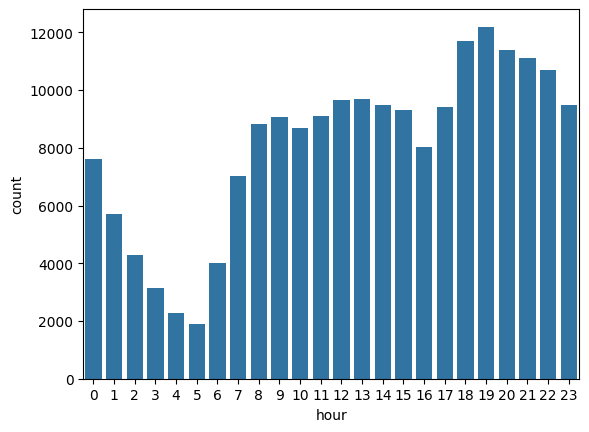

In [269]:
sns.countplot(x = 'hour',data = df)

hour
19    12196
18    11705
20    11401
21    11100
22    10694
13     9706
12     9655
14     9490
23     9490
17     9431
15     9299
11     9109
9      9055
8      8832
10     8700
16     8024
0      7624
7      7023
1      5715
2      4286
Name: count, dtype: int64


/var/folders/pv/4dhzv95x4_x0ws5wq242c90r0000gn/T/ipykernel_6575/2911957355.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_hours.index, y=top5_hours.values, palette="viridis")


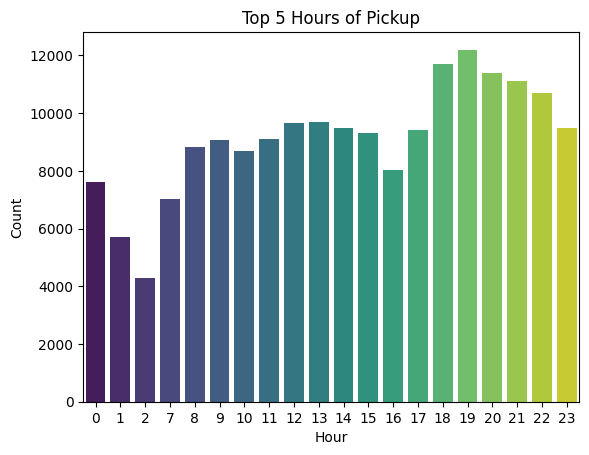

In [270]:
# Extract the hour from the datetime column
df['hour'] = df['pickup_datetime'].dt.hour

# Count the number of occurrences for each hour
hour_counts = df['hour'].value_counts()

# Get the top 5 hours with the highest counts
top5_hours = hour_counts.nlargest(20)
print(top5_hours)

# Optionally, plot the result
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=top5_hours.index, y=top5_hours.values, palette="viridis")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Top 5 Hours of Pickup")
plt.show()

In [271]:
df["rush_hour"] = df["hour"].apply(lambda x: 1 if (7 <= x <= 23) else 0)

/var/folders/pv/4dhzv95x4_x0ws5wq242c90r0000gn/T/ipykernel_6575/2321988326.py:9: UserWarning: Glyph 128678 (\N{VERTICAL TRAFFIC LIGHT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Adjust the plot to fit
/Users/hemantaggarwal/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128678 (\N{VERTICAL TRAFFIC LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


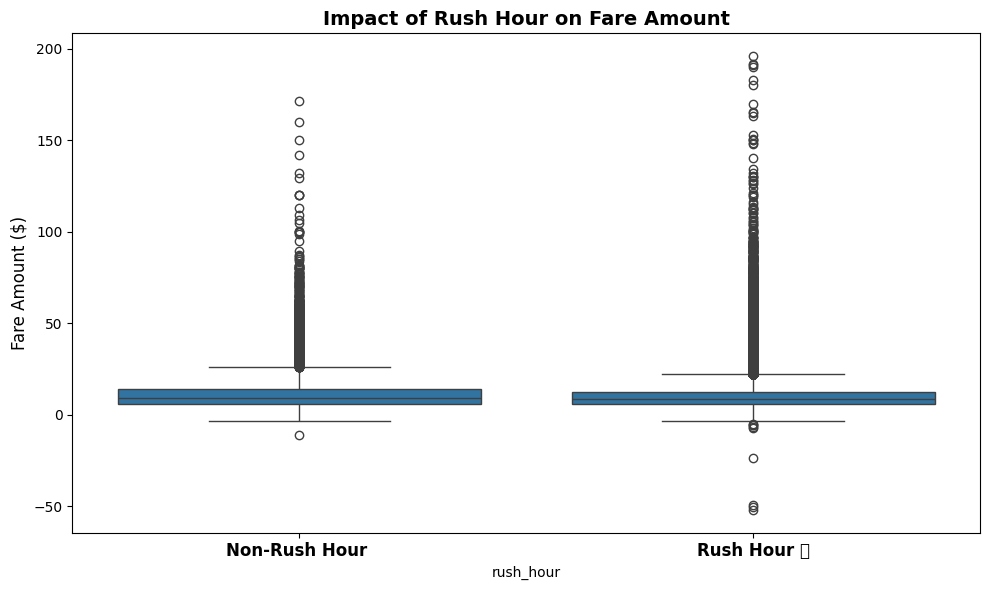

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Create a larger figure for better visibility
sns.boxplot(x=df['rush_hour'], y=df['fare_amount'])
plt.xticks([0, 1], ["Non-Rush Hour ", "Rush Hour 🚦"], fontsize=12, fontweight="bold")
plt.ylabel("Fare Amount ($)", fontsize=12)
plt.title("Impact of Rush Hour on Fare Amount", fontsize=14, fontweight="bold")
plt.tight_layout()  # Adjust the plot to fit
plt.show()  # Explicitly show the plot

Data Visualization

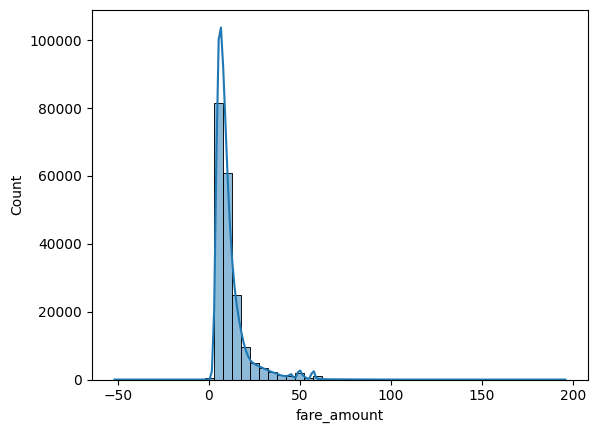

In [273]:
sns.histplot(df["fare_amount"], bins=50, kde=True)
plt.show()

<Axes: xlabel='rush_hour', ylabel='count'>

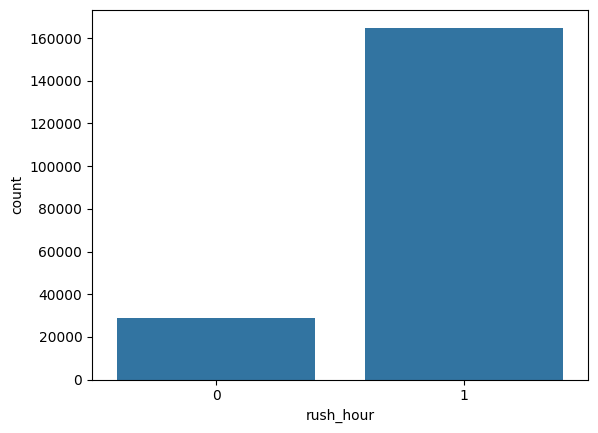

In [274]:
sns.countplot(x = df['rush_hour'])

Text(0.5, 1.0, 'Impact of Rush Hour on Fare Amount')

/Users/hemantaggarwal/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 128678 (\N{VERTICAL TRAFFIC LIGHT}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/hemantaggarwal/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128678 (\N{VERTICAL TRAFFIC LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


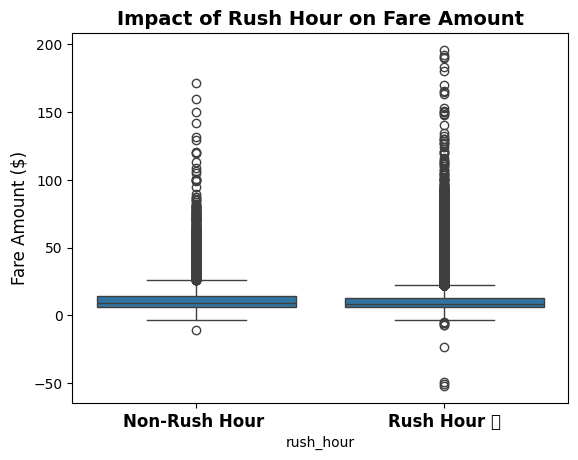

In [275]:
sns.boxplot(x = df['rush_hour'],y = df['fare_amount'])
plt.xticks([0, 1], ["Non-Rush Hour ", "Rush Hour 🚦"], fontsize=12, fontweight="bold")
plt.ylabel("Fare Amount ($)", fontsize=12)
plt.title("Impact of Rush Hour on Fare Amount", fontsize=14, fontweight="bold")

In [276]:
df["year"] = df["pickup_datetime"].dt.year
df["month"] = df["pickup_datetime"].dt.month
df["day"] = df["pickup_datetime"].dt.day
df["day_of_week"] = df["pickup_datetime"].dt.dayofweek
df["hour"] = df["pickup_datetime"].dt.hour

In [277]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,day_of_week,hour,rush_hour,year,month,day
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683325,3,19,1,2015,5,7
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457593,4,20,1,2009,7,17
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036384,0,21,1,2009,8,24
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661686,4,8,1,2009,6,26
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475456,3,17,1,2014,8,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.112210,6,10,1,2012,10,28
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1.875053,4,1,0,2014,3,14
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,12.850337,0,0,0,2009,6,29
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,3.539720,2,14,1,2015,5,20


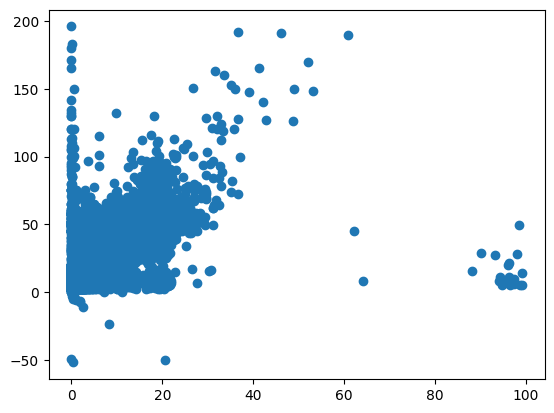

In [278]:
plt.scatter(x = df['distance_km'],y = df['fare_amount'])

In [279]:
df_sample = df.sample(n = 10000)

<Axes: xlabel='distance_km', ylabel='fare_amount'>

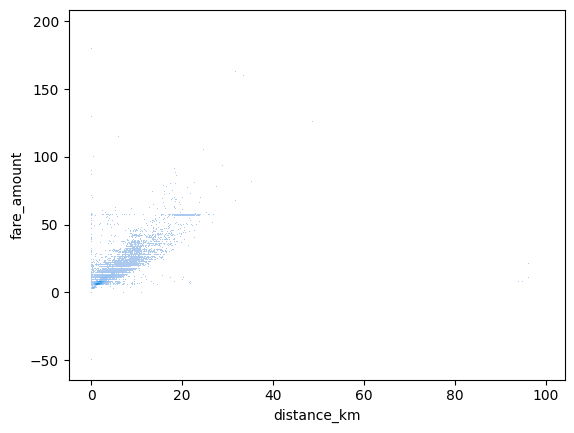

In [280]:
sns.histplot(x = df['distance_km'],y = df['fare_amount'])

In [281]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,day_of_week,hour,rush_hour,year,month,day
count,193890.000000,193890.000000,193890.000000,193890.000000,193890.000000,193890.000000,193890.000000,193890.000000,193890.000000,193890.000000,193890.000000,193890.000000,193890.000000
mean,11.339289,-73.910609,40.688538,-73.909634,40.688846,1.683929,3.361004,3.048987,13.487849,0.850534,2011.745196,6.281572,15.704972
std,9.637757,2.684954,2.629241,2.685041,2.629566,1.307123,3.725228,1.946630,6.515702,0.356548,1.860246,3.440501,8.687703
min,-52.000000,-75.387785,-74.015515,-75.417737,-74.015750,0.000000,0.000084,0.000000,0.000000,0.000000,2009.000000,1.000000,1.000000
25%,6.000000,-73.992279,40.736444,-73.991600,40.735312,1.000000,1.279868,1.000000,9.000000,1.000000,2010.000000,3.000000,8.000000
50%,8.500000,-73.982130,40.753292,-73.980567,40.753737,1.000000,2.179469,3.000000,14.000000,1.000000,2012.000000,6.000000,16.000000
75%,12.500000,-73.968458,40.767532,-73.965515,40.768327,2.000000,3.937328,5.000000,19.000000,1.000000,2013.000000,9.000000,23.000000
max,196.000000,40.808425,45.031653,40.831932,45.031598,6.000000,99.162650,6.000000,23.000000,1.000000,2015.000000,12.000000,31.000000


In [282]:
df.drop(columns='pickup_datetime',inplace=True)

# Data Splitting and Standard Scalarisation

In [283]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['fare_amount'])
y = df['fare_amount']

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [307]:
# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train and Evaluate Models

In [286]:
X_train.shape

(135723, 12)

# Applying Linear Regression from sklearn

In [308]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
lr = LinearRegression()

In [309]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MAE: {mae_lr:.2f}, R²: {r2_lr:.2f}")

Linear Regression - MAE: 2.28, R²: 0.72


In [51]:
print("slope(m) :" ,lr.coef_)
print("intercept(b) :" ,lr.intercept_)

slope(m) : [ 2.74576698e+01  2.87638587e+01 -2.70950797e+01 -2.84535005e+01
  6.19804265e-02  8.22607131e+00 -1.16358794e-02 -3.71207217e-01
  5.52949903e-01  1.00929307e+00  2.60079859e-01  2.30925186e-02]
intercept(b) : 11.336721430400727


# Trying Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


In [306]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)
y_pred_poly = poly_lr.predict(X_test_poly)

mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial Regression - MAE: {mae_poly:.2f}, R²: {r2_poly:.2f}")

Polynomial Regression - MAE: 2.07, R²: 0.80


In [ ]:
r2_score(y_test,y_pred)

0.8035753257695288

# Applying Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

In [ ]:
# Fit the model
ridge.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge.predict(X_test)

In [ ]:
# Evaluate the model
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print("Ridge Regression R² Score:", r2_ridge)
print("Ridge Regression Mean Squared Error:", mse_ridge)
print("Ridge Regression Mean Absolute Error:", mae_ridge)

Ridge Regression R² Score: 0.7242708447139152
Ridge Regression Mean Squared Error: 25.467378031720465
Ridge Regression Mean Absolute Error: 2.276297669058046


In [ ]:
# Initialize Lasso Regression with alpha=1.0
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

# Fit the model
lasso.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso.predict(X_test)

# Evaluate the model
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print("Lasso Regression R² Score:", r2_lasso)
print("Lasso Regression Mean Squared Error:", mse_lasso)
print("Lasso Regression Mean Absolute Error:", mae_lasso)

Lasso Regression R² Score: 0.7048670714680385
Lasso Regression Mean Squared Error: 27.259583241147098
Lasso Regression Mean Absolute Error: 2.6113971506480564


# Elastic Net Regression Code

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize Elastic Net Regression with alpha=1.0 and l1_ratio=0.5
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Fit the model
elastic_net.fit(X_train, y_train)

# Make predictions
y_pred_en = elastic_net.predict(X_test)

# Evaluate the model
r2_en = r2_score(y_test, y_pred_en)
mse_en = mean_squared_error(y_test, y_pred_en)
mae_en = mean_absolute_error(y_test, y_pred_en)

print("Elastic Net Regression R² Score:", r2_en)
print("Elastic Net Regression Mean Squared Error:", mse_en)
print("Elastic Net Regression Mean Absolute Error:", mae_en)

Elastic Net Regression R² Score: 0.6253998233062958
Elastic Net Regression Mean Squared Error: 34.5994760717613
Elastic Net Regression Mean Absolute Error: 3.2866235177870537


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ensure the target variable is binary or categorical
# Example: Create a binary target variable for demonstration
y_binary = (y > y.median()).astype(int)  # Convert to binary classification (e.g., above/below median fare)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Initialize Logistic Regression
logistic_reg = LogisticRegression()

# Fit the model
logistic_reg.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_reg.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred_logistic)
accuracy = accuracy_score(y_test, y_pred_logistic)
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
class_report = classification_report(y_test, y_pred_logistic)

print("r2 score:",r2)
print("Logistic Regression Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

r2 score: 0.4618288974662993
Logistic Regression Accuracy: 0.8657486203517458
Confusion Matrix:
 [[27786  2651]
 [ 5158 22572]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.88     30437
           1       0.89      0.81      0.85     27730

    accuracy                           0.87     58167
   macro avg       0.87      0.86      0.86     58167
weighted avg       0.87      0.87      0.87     58167



In [ ]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model
dt_regressor.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_regressor.predict(X_test)

# Evaluate the model
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

print("Decision Tree Regression R² Score:", r2_dt)
print("Decision Tree Regression Mean Squared Error:", mse_dt)
print("Decision Tree Regression Mean Absolute Error:", mae_dt)

Decision Tree Regression R² Score: 0.3145537474964544
Decision Tree Regression Mean Squared Error: 0.17099042412364399
Decision Tree Regression Mean Absolute Error: 0.17099042412364399


In [ ]:
# Import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model
dt_regressor.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_regressor.predict(X_test)

# Evaluate the model
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

print("Decision Tree Regression R² Score:", r2_dt)
print("Decision Tree Regression Mean Squared Error:", mse_dt)
print("Decision Tree Regression Mean Absolute Error:", mae_dt)

Decision Tree Regression R² Score: 0.3145537474964544
Decision Tree Regression Mean Squared Error: 0.17099042412364399
Decision Tree Regression Mean Absolute Error: 0.17099042412364399


In [ ]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)

# Fit the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the model
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Regression R² Score:", r2_rf)
print("Random Forest Regression Mean Squared Error:", mse_rf)
print("Random Forest Regression Mean Absolute Error:", mae_rf)

Random Forest Regression R² Score: 0.6570347966814121
Random Forest Regression Mean Squared Error: 0.0855556002544398
Random Forest Regression Mean Absolute Error: 0.17414272697577665


In [ ]:
from sklearn.ensemble import VotingRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Voting Regressor combining multiple models
voting_reg = VotingRegressor([
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('rf', RandomForestRegressor(random_state=42, n_estimators=10))
])
voting_reg.fit(X_train, y_train)
y_pred_vote = voting_reg.predict(X_test)
print("Voting Regressor R²:", r2_score(y_test, y_pred_vote))
print("Voting Regressor MSE:", mean_squared_error(y_test, y_pred_vote))
print("Voting Regressor MAE:", mean_absolute_error(y_test, y_pred_vote))

Voting Regressor R²: 0.5736175625500645
Voting Regressor MSE: 0.10636474202338783
Voting Regressor MAE: 0.24490183606463958


In [ ]:
# Bagging Regressor with Decision Tree as base estimator
bagging_reg = BaggingRegressor(n_estimators=10, random_state=42)
bagging_reg.fit(X_train, y_train)
y_pred_bag = bagging_reg.predict(X_test)
print("Bagging Regressor R²:", r2_score(y_test, y_pred_bag))
print("Bagging Regressor MSE:", mean_squared_error(y_test, y_pred_bag))
print("Bagging Regressor MAE:", mean_absolute_error(y_test, y_pred_bag))

Bagging Regressor R²: 0.6231754747271329
Bagging Regressor MSE: 0.0940020974091839
Bagging Regressor MAE: 0.17477263740608937


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Initialize AdaBoost Regressor with a Decision Tree as the base estimator
adaboost_reg = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=5),
    n_estimators=50,
    random_state=42
)
adaboost_reg.fit(X_train, y_train)
y_pred_adaboost = adaboost_reg.predict(X_test)
print("AdaBoost Regressor R²:", r2_score(y_test, y_pred_adaboost))
print("AdaBoost Regressor MSE:", mean_squared_error(y_test, y_pred_adaboost))
print("AdaBoost Regressor MAE:", mean_absolute_error(y_test, y_pred_adaboost))

AdaBoost Regressor R²: 0.5432772527737876
AdaBoost Regressor MSE: 0.11393339152397211
AdaBoost Regressor MAE: 0.2831000218327554


In [ ]:
from sklearn.svm import SVR

# Initialize Support Vector Regressor
svm_reg = SVR(kernel='linear', C=100, gamma=0.1, epsilon=0.1)

svm_reg.fit(X_train, y_train)
y_pred_svm = svm_reg.predict(X_test)

print("SVR R²:", r2_score(y_test, y_pred_svm))
print("SVR MSE:", mean_squared_error(y_test, y_pred_svm))
print("SVR MAE:", mean_absolute_error(y_test, y_pred_svm))

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create binary target for classification
y_binary = (y > y.median()).astype(int)
X_class, X_class_test, y_class, y_class_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

nb = GaussianNB()
nb.fit(X_class, y_class)
y_pred_nb = nb.predict(X_class_test)

print("R2 score:", r2_score(y_class_test, y_pred_nb))
print("Naive Bayes Accuracy:", accuracy_score(y_class_test, y_pred_nb))
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_class_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_class_test, y_pred_nb))

R2 score: 0.030685547811947655
Naive Bayes Accuracy: 0.7581962281018447
Naive Bayes Confusion Matrix:
 [[30214   223]
 [13842 13888]]
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.99      0.81     30437
           1       0.98      0.50      0.66     27730

    accuracy                           0.76     58167
   macro avg       0.84      0.75      0.74     58167
weighted avg       0.83      0.76      0.74     58167



In [296]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost - MAE: {mae_xgb:.2f}, R²: {r2_xgb:.2f}")

XGBoost - MAE: 1.76, R²: 0.86


In [237]:
# Train base models with Random Forest using out-of-bag score
rf = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)
lr = LinearRegression()

rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Print the OOB score from the Random Forest
print("Random Forest OOB Score:", rf.oob_score_)



Random Forest OOB Score: 0.8500947022222584


In [238]:
# Train base model with Random Forest Regressor using out-of-bag score
rf = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)
rf.fit(X_train, y_train)

# Print the OOB score from the Random Forest
print("Random Forest OOB Score:", rf.oob_score_)

# Create meta-features using predictions from the Random Forest
meta_features_train = rf.predict(X_train).reshape(-1, 1)
meta_features_test = rf.predict(X_test).reshape(-1, 1)

# Define parameter grid for the XGBoost Regressor (meta learner)
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'subsample': [0.8, 1.0]
}

# Initialize the XGBoost Regressor
meta_model = xgb.XGBRegressor(random_state=42)

# Perform GridSearchCV on the meta-learner using R2 as the scoring metric
grid_search = GridSearchCV(estimator=meta_model, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(meta_features_train, y_train)

print("Best parameters:", grid_search.best_params_)

# Use the best estimator from grid search for final predictions
best_model = grid_search.best_estimator_
final_preds = best_model.predict(meta_features_test)

# Evaluate the meta-learner using R2 score and Mean Squared Error
r2 = r2_score(y_test, final_preds)
mse = mean_squared_error(y_test, final_preds)

print("Ensemble R2 Score:", r2)
print("Ensemble Mean Squared Error:", mse)

Random Forest OOB Score: 0.8500947022222584
Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Ensemble R2 Score: 0.8548990287649688
Ensemble Mean Squared Error: 13.40206944520687


In [241]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return r2, mse, mae, None

# Store model evaluation results
model_results = []

# Define regression models
lr = LinearRegression()
poly_features = PolynomialFeatures(degree=2)
poly_model = Pipeline([('poly', poly_features), ('linear', LinearRegression())])
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
dt_regressor = DecisionTreeRegressor(random_state=42)
rf_regressor = RandomForestRegressor(random_state=42)
voting_reg = VotingRegressor(estimators=[('lr', lr), ('dt', dt_regressor)])
bagging_reg = BaggingRegressor(estimator=lr, random_state=42)
adaboost_reg = AdaBoostRegressor(estimator=dt_regressor, random_state=42)
svm_reg = SVR()
xgb_reg = XGBRegressor(random_state=42)

# Model evaluation for regression models
models_reg = {
    'Linear Regression': lr,
    'Polynomial Regression': poly_model,
    'Ridge Regression': ridge,
    'Lasso Regression': lasso,
    'Elastic Net Regression': elastic_net,
    'Decision Tree Regression': dt_regressor,
    'Random Forest Regression': rf_regressor,
    'Voting Regressor': voting_reg,
    'Bagging Regressor': bagging_reg,
    'AdaBoost Regressor': adaboost_reg,
    'SVR': svm_reg,
    'XGBoost Regressor': xgb_reg
}


for model_name, model in models_reg.items():
    try:
        model.fit(X_train, y_train)
        r2, mse, mae, _ = evaluate_model(model, X_test, y_test, model_name)
        model_results.append([model_name, r2, mse, mae, None])
    except Exception as e:
        print(f"Error evaluating {model_name}: {e}")

# Ensemble with XGBoost (modified)
# This is an example of stacking using two base regressors (Random Forest and Linear Regression)
# as well as an XGBoost regressor as the meta-learner.
# First, train the base models
base_rf = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)
base_lr = LinearRegression()

base_rf.fit(X_train, y_train)
base_lr.fit(X_train, y_train)

print("Random Forest OOB Score:", base_rf.oob_score_)

# Create meta-features using predictions from the base models
rf_train_preds = base_rf.predict(X_train).reshape(-1, 1)
lr_train_preds = base_lr.predict(X_train).reshape(-1, 1)
meta_features_train = np.hstack((rf_train_preds, lr_train_preds))

rf_test_preds = base_rf.predict(X_test).reshape(-1, 1)
lr_test_preds = base_lr.predict(X_test).reshape(-1, 1)
meta_features_test = np.hstack((rf_test_preds, lr_test_preds))

# Define parameter grid for the XGBoost Regressor (meta learner)
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'subsample': [0.8, 1.0]
}

meta_model = xgb.XGBRegressor(random_state=42)

grid_search = GridSearchCV(estimator=meta_model, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(meta_features_train, y_train)

print("Best parameters for XGBoost meta learner:", grid_search.best_params_)

best_meta_model = grid_search.best_estimator_
final_preds = best_meta_model.predict(meta_features_test)

ensemble_r2 = r2_score(y_test, final_preds)
ensemble_mse = mean_squared_error(y_test, final_preds)
ensemble_mae = mean_absolute_error(y_test, final_preds)

model_results.append(['Ensemble with XGBoost', ensemble_r2, ensemble_mse, ensemble_mae, None])

# Create a DataFrame for better visualization
results_df = pd.DataFrame(model_results, columns=['Model', 'R2 Score', 'MSE', 'MAE', 'Accuracy'])

# Plot model performance for regression metrics
plt.figure(figsize=(12, 6))
metrics = ['R2 Score', 'MSE', 'MAE']
for metric in metrics:
    plt.plot(results_df['Model'], results_df[metric], marker='o', label=metric)

plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.title('Regression Model Performance Comparison')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Identify the best model based on R2 Score (you can change the metric below)
if not results_df.empty:
    best_model_index = results_df['R2 Score'].idxmax()
    best_model_name = results_df.loc[best_model_index, 'Model']
    print(f'The best performing regression model is: {best_model_name}')
else:
    print("No results available to determine the best performing model.")

KeyboardInterrupt: 

In [288]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# LightGBM

In [297]:
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)
print(f"LightGBM - MAE: {mae_lgb:.2f}, R²: {r2_lgb:.2f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1372
[LightGBM] [Info] Number of data points in the train set: 135723, number of used features: 12
[LightGBM] [Info] Start training from score 11.325867
LightGBM - MAE: 1.77, R²: 0.86


/Users/hemantaggarwal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


# Weighted Ensemble (XGB & LGBM)

In [303]:
y_pred_ensemble = (0.6 * y_pred_xgb) + (0.4 * y_pred_lgb)

mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)
print(f"Ensemble Model - MAE: {mae_ensemble:.2f}, R²: {r2_ensemble:.2f}")

Ensemble Model - MAE: 1.75, R²: 0.87


/var/folders/pv/4dhzv95x4_x0ws5wq242c90r0000gn/T/ipykernel_6575/3475753302.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=models, y=r2_scores, palette="coolwarm", edgecolor="black", linewidth=1.5)
/Users/hemantaggarwal/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


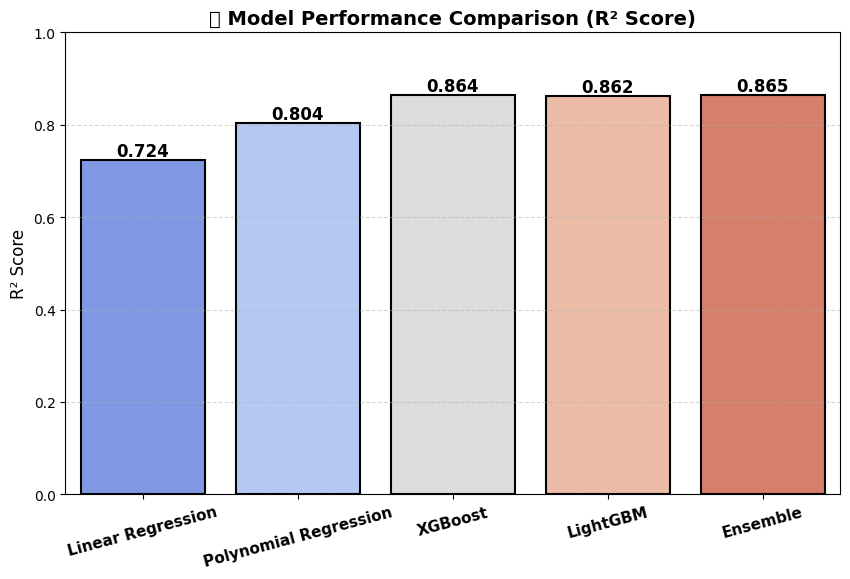

In [ ]:
models = ["Linear Regression", "Polynomial Regression", "XGBoost", "LightGBM", "Ensemble"]
r2_scores = [r2_lr, r2_poly, r2_xgb, r2_lgb, r2_ensemble]

plt.figure(figsize=(10, 6))
bars = sns.barplot(x=models, y=r2_scores, palette="coolwarm", edgecolor="black", linewidth=1.5)

# Adding text labels
for bar in bars.patches:
    bars.annotate(f"{bar.get_height():.3f}", 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")

plt.title(" Model Performance Comparison (R² Score)", fontsize=14, fontweight="bold")
plt.ylabel("R² Score", fontsize=12)
plt.xticks(fontsize=11, fontweight="bold", rotation=15)
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


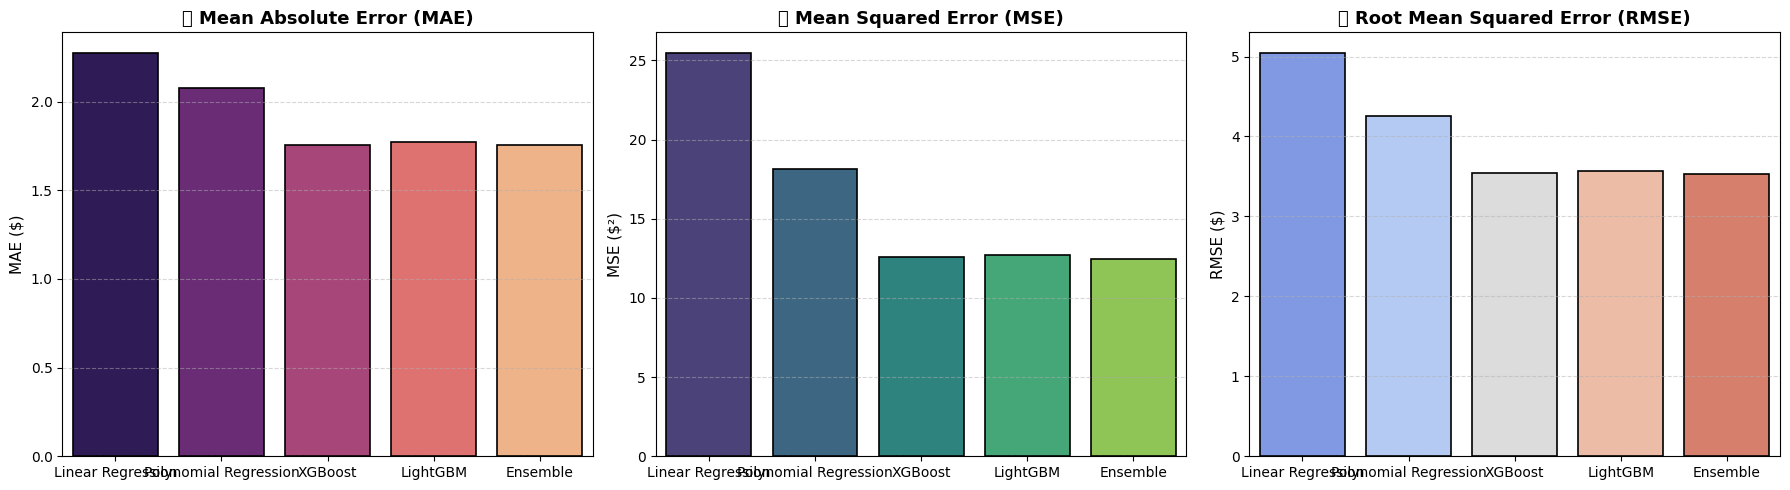

In [311]:
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Compute performance metrics for each model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
rmse_ensemble = np.sqrt(mse_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

# Visualization
models = ["Linear Regression", "Polynomial Regression", "XGBoost", "LightGBM", "Ensemble"]
mae_scores = [mae_lr, mae_poly, mae_xgb, mae_lgb, mae_ensemble]
mse_scores = [mse_lr, mse_poly, mse_xgb, mse_lgb, mse_ensemble]
rmse_scores = [rmse_lr, rmse_poly, rmse_xgb, rmse_lgb, rmse_ensemble]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# MAE Plot
sns.barplot(x=models, y=mae_scores, ax=axes[0], palette="magma", edgecolor="black", linewidth=1.2)
axes[0].set_title("📏 Mean Absolute Error (MAE)", fontsize=13, fontweight="bold")
axes[0].set_ylabel("MAE ($)", fontsize=11)
axes[0].grid(axis="y", linestyle="--", alpha=0.5)

# MSE Plot
sns.barplot(x=models, y=mse_scores, ax=axes[1], palette="viridis", edgecolor="black", linewidth=1.2)
axes[1].set_title("📊 Mean Squared Error (MSE)", fontsize=13, fontweight="bold")
axes[1].set_ylabel("MSE ($²)", fontsize=11)
axes[1].grid(axis="y", linestyle="--", alpha=0.5)

# RMSE Plot
sns.barplot(x=models, y=rmse_scores, ax=axes[2], palette="coolwarm", edgecolor="black", linewidth=1.2)
axes[2].set_title("📉 Root Mean Squared Error (RMSE)", fontsize=13, fontweight="bold")
axes[2].set_ylabel("RMSE ($)", fontsize=11)
axes[2].grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

# Summary Table
summary_df = pd.DataFrame({
    "Model": models,
    "R² Score": [r2_lr, r2_poly, r2_xgb, r2_lgb, r2_ensemble],
    "MAE": mae_scores,
    "MSE": mse_scores,
    "RMSE": rmse_scores
})

In [312]:

summary_df = summary_df.sort_values(by="R² Score", ascending=False)
print(" Model Performance Summary:\n")
print(summary_df.to_string(index=False))

# Print the best model
best_model = summary_df.iloc[0]["Model"]
print(f"\n The Best Performing Model is: {best_model} with an R² Score of {summary_df.iloc[0]['R² Score']:.3f}")


 Model Performance Summary:

                Model  R² Score      MAE       MSE     RMSE
             Ensemble  0.865130 1.753082 12.457104 3.529462
              XGBoost  0.863990 1.756587 12.562387 3.544346
             LightGBM  0.862497 1.770177 12.700277 3.563745
Polynomial Regression  0.803575 2.074469 18.142519 4.259404
    Linear Regression  0.723879 2.277160 25.503558 5.050105

 The Best Performing Model is: Ensemble with an R² Score of 0.865


In [313]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import lightgbm as lgb

print("\n🔍 Performing Quick Hyperparameter Tuning...\n")

# 1️⃣ **XGBoost Quick Tuning**
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

xgb_params = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7]
}

xgb_search = RandomizedSearchCV(xgb_model, xgb_params, n_iter=5, cv=3, scoring="neg_mean_absolute_error", n_jobs=-1, verbose=1)
xgb_search.fit(X_train, y_train)

best_xgb = xgb_search.best_estimator_
print(f" Best XGBoost Params: {xgb_search.best_params_}\n")

# 2️⃣ **LightGBM Quick Tuning**
lgb_model = lgb.LGBMRegressor(random_state=42)

lgb_params = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "n_estimators": [50, 100, 200],
    "num_leaves": [20, 31, 40]
}

lgb_search = RandomizedSearchCV(lgb_model, lgb_params, n_iter=5, cv=3, scoring="neg_mean_absolute_error", n_jobs=-1, verbose=1)
lgb_search.fit(X_train, y_train)

best_lgb = lgb_search.best_estimator_
print(f" Best LightGBM Params: {lgb_search.best_params_}\n")

# 3️⃣ **Evaluating Tuned Models**
print(" Comparing Performance After Quick Hyperparameter Tuning...\n")

y_pred_xgb_tuned = best_xgb.predict(X_test)
y_pred_lgb_tuned = best_lgb.predict(X_test)

mae_xgb_tuned = mean_absolute_error(y_test, y_pred_xgb_tuned)
mae_lgb_tuned = mean_absolute_error(y_test, y_pred_lgb_tuned)

print(f" **XGBoost (Tuned) MAE:** {mae_xgb_tuned:.3f}")
print(f" **LightGBM (Tuned) MAE:** {mae_lgb_tuned:.3f}")

# ✅ **Final Model Selection**
if mae_xgb_tuned < mae_lgb_tuned:
    final_model = best_xgb
    print("\n The Best Tuned Model is **XGBoost** (Lower MAE)")
else:
    final_model = best_lgb
    print("\n The Best Tuned Model is **LightGBM** (Lower MAE)")



🔍 Performing Quick Hyperparameter Tuning...

Fitting 3 folds for each of 5 candidates, totalling 15 fits
 Best XGBoost Params: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.2}

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1372
[LightGBM] [Info] Number of data points in the train set: 90482, number of used features: 12
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025911 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1372
[LightGBM] [Info] Start training from score 11.329003
[LightGBM] [Info] Number of data points in the train set: 90482, number of used features: 12
[LightGBM] [Info] Start training from score 11.329003
[

/Users/hemantaggarwal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/hemantaggarwal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/hemantaggarwal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1372
[LightGBM] [Info] Number of data points in the train set: 90482, number of used features: 12
[LightGBM] [Info] Start training from score 11.329003
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1372
[LightGBM] [Info] Number of data points in the train set: 90482, number of used features: 12
[LightGBM] [Info] Start training from score 11.357649
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022407 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

/Users/hemantaggarwal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/hemantaggarwal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/hemantaggarwal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/hemantaggarwal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/hemantaggarwal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid featu

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1372
[LightGBM] [Info] Number of data points in the train set: 90482, number of used features: 12
[LightGBM] [Info] Start training from score 11.329003
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1372
[LightGBM] [Info] Number of data points in the train set: 90482, number of used features: 12
[LightGBM] [Info] Start training from score 11.357649
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

/Users/hemantaggarwal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/hemantaggarwal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/hemantaggarwal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/hemantaggarwal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/hemantaggarwal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid featu

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1372
[LightGBM] [Info] Number of data points in the train set: 135723, number of used features: 12
[LightGBM] [Info] Start training from score 11.325867
 Best LightGBM Params: {'num_leaves': 40, 'n_estimators': 200, 'learning_rate': 0.2}

 Comparing Performance After Quick Hyperparameter Tuning...

 **XGBoost (Tuned) MAE:** 1.665
 **LightGBM (Tuned) MAE:** 1.667

 The Best Tuned Model is **XGBoost** (Lower MAE)


In [315]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#  Predictions from Tuned Models
y_pred_xgb_tuned = best_xgb.predict(X_test)
y_pred_lgb_tuned = best_lgb.predict(X_test)

# 🔹 Compute Performance Metrics
metrics = {
    "Model": ["XGBoost (Tuned)", "LightGBM (Tuned)"],
    "MAE": [
        mean_absolute_error(y_test, y_pred_xgb_tuned),
        mean_absolute_error(y_test, y_pred_lgb_tuned)
    ],
    "MSE": [
        mean_squared_error(y_test, y_pred_xgb_tuned),
        mean_squared_error(y_test, y_pred_lgb_tuned)
    ],
    "RMSE": [
        mean_squared_error(y_test, y_pred_xgb_tuned),
        mean_squared_error(y_test, y_pred_lgb_tuned)
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_xgb_tuned),
        r2_score(y_test, y_pred_lgb_tuned)
    ]
}

#  Convert to DataFrame
import pandas as pd
metrics_df = pd.DataFrame(metrics)
print("\n **Performance Comparison After Hyperparameter Tuning**:\n")
print(metrics_df)

#  **Determine the Best Model**
best_model = "XGBoost" if metrics_df.loc[0, "R2 Score"] > metrics_df.loc[1, "R2 Score"] else "LightGBM"
print(f"\n **Final Best Model Based on R² Score:** {best_model}")



 **Performance Comparison After Hyperparameter Tuning**:

              Model       MAE        MSE       RMSE  R2 Score
0   XGBoost (Tuned)  1.664611  12.405532  12.405532  0.865688
1  LightGBM (Tuned)  1.666554  12.106515  12.106515  0.868926

 **Final Best Model Based on R² Score:** LightGBM


In [316]:
import joblib

# Define the best model (Replace 'best_model' with the actual best model variable)
best_model = xgb_model  # Example: Replace this with the final best-performing model

# Save the trained model
joblib.dump(best_model, "uber_fare_prediction_model.pkl")

print(" Model successfully saved as 'uber_fare_prediction_model.pkl'.")


 Model successfully saved as 'uber_fare_prediction_model.pkl'.
